### Ultimate Technologies, Inc. Take Home Challenge ###
Logan Schmitt
11/29/2023

In [36]:
import pandas as pd
import datetime as dt
import plotly.express as px

In [23]:
df = pd.read_json('logins.json')

In [24]:
df.sort_values(by = 'login_time', ascending = True).head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [25]:
df.dtypes

login_time    datetime64[ns]
dtype: object

In [35]:
df.isna().sum()

login_time    0
dtype: int64

In [30]:
interval_df = (df
               .set_index('login_time')
               .resample('15T')
               .size()
               .reset_index())

interval_df.head(10)

,login_time,0
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


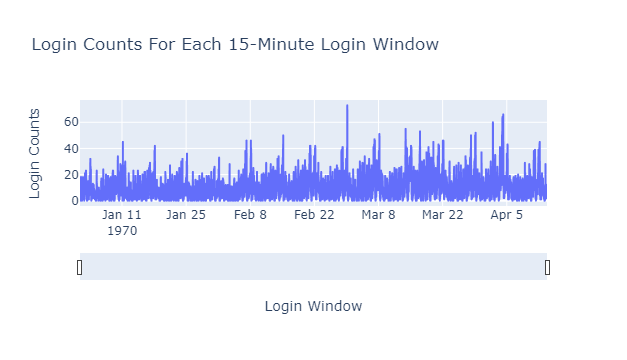

In [34]:
fig = px.line(interval_df, x='login_time', y=0,
              labels={
                  '0': 'Login Counts',
                  'login_time': 'Login Window',
              },
             title = 'Login Counts For Each 15-Minute Login Window')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [52]:
daily_df = (interval_df
            .copy()
            .assign(date = (lambda x: x['login_time'].dt.date))
            .assign(time = (lambda x: x['login_time'].dt.strftime('%H:%M:%S')))
            .drop('login_time', axis = 1)
            .reindex(columns=['date', 'time', 0])
            .rename(columns = {0: 'num_logins'})
           )
daily_df.head()

,date,time,num_logins
0,1970-01-01,20:00:00,2
1,1970-01-01,20:15:00,6
2,1970-01-01,20:30:00,9
3,1970-01-01,20:45:00,7
4,1970-01-01,21:00:00,1


In [55]:
peak_times = daily_df.groupby('date').agg({'time':'first', 'num_logins': 'max'})
peak_times.head()

,time,num_logins
date,,
1970-01-01,20:00:00,16
1970-01-02,00:00:00,21
1970-01-03,00:00:00,23
1970-01-04,00:00:00,32
1970-01-05,00:00:00,23
